# Minimisation Libraries

Part of the power of the Python programming language comes from the vast ecosystem of pre-existing libraries that are available to use. 
Previously, you have written your own minimisation algorithms in Python, using loops and functions. 
Numerical function minimisation is a very common scientific problem, and, perhaps unsurprisingly, there is a library that we can use to do this. 
The library is called `scipy` (pronounced Sigh-Pie), and includes an enormous number of common scientific computing utilities. In this section, we will focus on the `minimize` method (note the American spelling). 

The `minimize` method is located within the `optimize` module of the `scipy` library, so to access this, we must import it.

In [2]:
from scipy.optimize import minimize

Let us first investigate the documentation of the minimize function, this is available [online](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) or it can be printed in the Jupyter Notebook using 

```python
print(minimize.__doc__)
```
or
```python
minimize?
```
Because this documentation is long we will not reproduce it fully here, but it is useful to know where to look when figuring out how a new function or method behaves.

From the documentation, we can see that the `minimize` function takes two required arguments:

- `fun`: this is the function that we will minimize.
- `x0`: this is our initial guess of the parameter used in the minimisation.

The only optional argument we will look at from the documentation is `args`, which are the invariant (unchanging) parameters in our model that should be passed to our function. For example, in the case of our Lennard-Jones potential, the precise shape of the function depends on the invariant parameters $A$ and $B$, so if we want to ue `minimize` to find the minimum of our function, we need to specify the relevant values of $A$ and $B$.

To minimize the potential energy from the Lennard-Jones potential, we write a function for this, this is the `fun` discussed above. The parameter we are minimising with respect to (in this case, the interatomic separation, $r$) needs to be the first argument in our function, followed by any additional parameters that we are not varying as part of our minimisation (here $A$ and $B$).

In [1]:
def harmonic_potential(r, k, r0):
    return 0.5 * k * (r - r0)**2

In [2]:
def lennard_jones(r, A, B):
    """
    Lennard-Jones potential energy.
    
    Args:
        r (float): the distances to find the energy for (Å).
        A (float): the repulsive prefactor (eV/Å^12).
        B (float): the attractive prefactor (eV/Å^6).
    
    Returns:
        (float): the potential energy at each r.
    """
    return A / r**12 - B / r**6

Note in the documentation, it says that the `minimize` function should be passed a function with the form

```
fun(x, *args) -> float
```

Above, this is mapped out, were `r` is our `x` and `A, B` are the `*args` (note the `*` means this can be any number of `args`). 
The `args` are not varied during the minimisation process. 
The `minimization` function works as follows.

In [28]:
k = 574
r0 = 0.74

result = minimize(harmonic_potential, 1.0, args=(k, r0))

result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.342973618343429e-16
        x: [ 7.400e-01]
      nit: 1
      jac: [ 4.795e-06]
 hess_inv: [[1]]
     nfev: 6
     njev: 3

In [21]:
minimize?

Signature:
minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is a 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where ``n`` is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see here) <

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

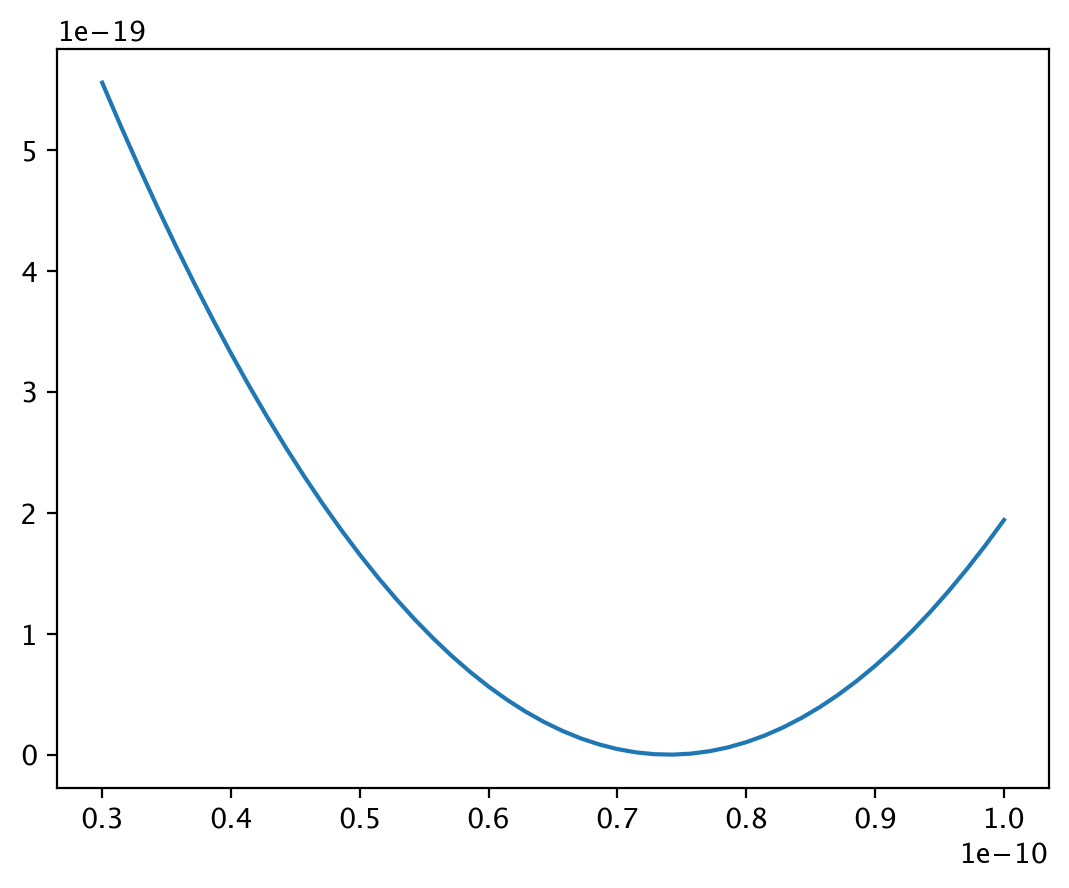

In [17]:
import numpy as np

r = np.linspace(0.3, 1.0)*1e-10

plt.plot(r, harmonic_potential(r, k, r0))
plt.show()

In [3]:
A = 1e5
B = 40

result = minimize(lennard_jones, [3.5], args=(A, B))

In [4]:
print(result)

      fun: -0.003999999054071188
 hess_inv: array([[54.70574037]])
      jac: array([-5.64771472e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([4.13485048])


The object that is returned by the `minimize` function is a special object which gives a lot of information about the minimisation.
The value we are interested in is the minimum energy difference, which is the `x` attribute of this object. 

In [5]:
print(result.x)

[4.13485048]


This agrees well with the value that we found when writing our own minimisation methods. 

## Exercise

Write a function to model the following potential energy function, 

$$ E = \frac{1}{2} \{A_1[1 + \cos{(\phi)}] + A_2[1 + \cos{(2\phi)}] + A_3[1 + \cos{(3\phi)}]\}, $$

this function describes the potential energy of the Cl-C-C-Cl dihedral angle in a molecule of 1, 2-dichloroethane, where $A_1 = 55.229$ kJ/mol, $A_2 = 3.3472$ kJ/mol, $A_3 = -58.576$ kJ/mol and $\phi$ is the dihedral angle.

1. Plot this function between $-\pi$ and $\pi$, remember to label your axes. 
2. Using `minimize` test different initial values of `x0` for $\phi$. Consider why the result is so dependent on the starting position for this function (it may help to plot your result on the function). 

### Tip

It is advised to use the [NumPy trigonmetric functions](https://numpy.org/doc/stable/reference/generated/numpy.cos.html) in this exercise. 